<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Loading-appliances-list" data-toc-modified-id="Loading-appliances-list-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Loading appliances list</a></span></li><li><span><a href="#Creating-generator-functions" data-toc-modified-id="Creating-generator-functions-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Creating generator functions</a></span><ul class="toc-item"><li><span><a href="#Light-Consumption-Function" data-toc-modified-id="Light-Consumption-Function-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Light Consumption Function</a></span></li><li><span><a href="#Heating-consumption-function" data-toc-modified-id="Heating-consumption-function-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Heating consumption function</a></span></li></ul></li></ul></div>

Used as a source for energy consumption: [link](https://assets.publishing.service.gov.uk/government/uploads/system/uploads/attachment_data/file/208097/10043_R66141HouseholdElectricitySurveyFinalReportissue4.pdf)

## Loading appliances list

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import seaborn as sns
import matplotlib.pyplot as plt

# We load all the appliances
appliances = pd.read_csv("Data_Files/dataMapFloat.csv")

In [2]:
list_appliances = appliances.name.to_numpy()
list_appliances

array(['Lights (Analogue)', 'Heater (Analogue)', 'Lights 1 (Analogue)',
       'Lights 2 (Analogue)', 'Lights (Analogue)', 'Lights 1 (Analogue)',
       'Lights 2 (Analogue)', 'Heater (Analogue)', 'Lights (Analogue)',
       'Heater (Analogue)', 'Lights 1 (Analogue)', 'Lights 2 (Analogue)',
       'Lights (Analogue)', 'Heater 1 (Analogue)', 'Heater 2 (Analogue)',
       'Lights (Analogue)', 'Heater (Analogue)', 'Lights 1 (Analogue)',
       'Lights 2 (Analogue)', 'Heater (Analogue)', 'Lights (Analogue)',
       'Heater (Analogue)', 'Lights (Analogue)', 'Heater (Analogue)',
       'Lights (Analogue)', 'Heater (Analogue)', 'Lights (Analogue)',
       'Heater (Analogue)', 'Lights 1 (Analogue)', 'Lights 2 (Analogue)',
       'Lights 3 (Analogue)', 'Heater (Analogue)',
       'Lights Poarch 1 (Analogue)', 'Lights Poarch 2 (Analogue)',
       'Lights Pool (Analogue)', 'Lights Garden (Analogue)',
       'Lights Entrance (Analogue)'], dtype=object)

In [3]:
def hour_rounder(t):
    """
        Rounds to nearest hour by adding a timedelta hour if minute >= 30
    """
    return (t.replace(second=0, microsecond=0, minute=0, hour=t.hour)
               +timedelta(hours=t.minute//30))

## Creating generator functions
### Light Consumption Function

In [10]:
def generates_random_consumption_light(timestamps, watts=16):
    """
        Generates random light consumption until a given date.
        
        Input:
            - timestamps: list of timestamps at which we generate a value
            - watts: the wattage of the lightbulb (defaults: 16 for a LED, other values may include 100 for an incandescent, and 25 for a CFL)
        Output:
            - array of object with timestamps and the associated value
    """
    
    
    res = []
        
    for timestamp in timestamps:
        
        tmp_date = datetime.fromtimestamp(timestamp)
        
        # during the day, having a turned on light bulb is very unlikely
        if tmp_date.hour > 10 or tmp_date.hour < 17:
            prob = 0.2
        
        # during the night, having a turned on light bulb is unlikely
        elif tmp_date.hour > 22 or tmp_date.hour < 6:
            prob = 0.4
            
        # during the evening and early morning, having a turned on light bulb is very likely
        else:
            prob = 0.9
        
        val = np.random.normal(prob*watts, np.sqrt(watts), 1)[0]
        
        res.append(
            val if val > 0 else 0
        )
    
        tmp_date = tmp_date - timedelta(hours = 1)
    
    return res

Seasonality effect function:
$ y = \dfrac{(x-27)^{2}}{240} $

Check the curve in the next cell

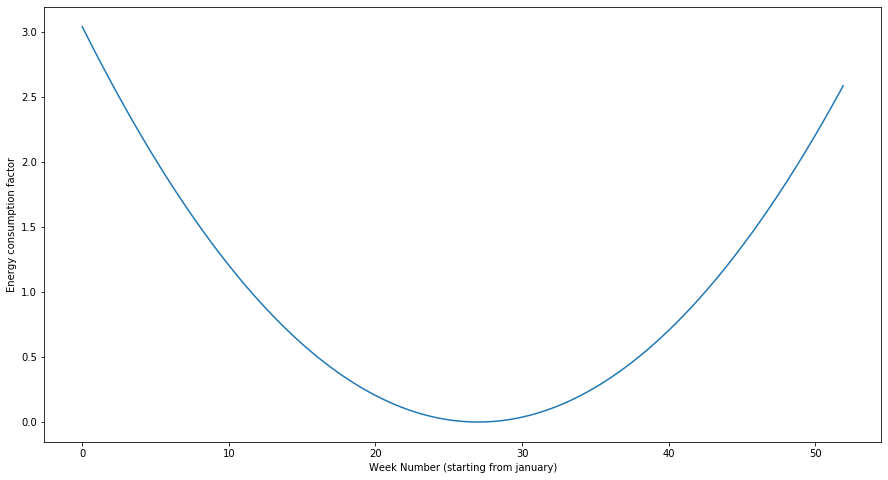

In [11]:
def seasonality_effect_function(x):
    return ((x-27)**2)/240

x = np.arange(0,52,0.1)
y = [seasonality_effect_function(x_val) for x_val in x]

plt.figure(figsize=(15,8))
ax = sns.lineplot(x,y)
ax.set(xlabel='Week Number (starting from january)', ylabel='Energy consumption factor')
plt.show()

### Heating consumption function

In [15]:
seasonality_effect_factor = [seasonality_effect_function(x) for x in range(52)] # we generate a factor for every week of the year

def seasonality_effect(date):
    week_number = date.isocalendar()[1]
    return seasonality_effect_factor[week_number-1]

def generates_random_consumption_heater(timestamps, watts=16):
    """
        Generates random heat consumption until a given date. 
        To model seasonality effect on the consumption, we use a polynomial function to transform our mean 
        
        Input:
            - timestamps: list of timestamps at which we generate a value
            - watts: the wattage of the lightbulb (defaults: 16 for a LED, other values may include 100 for an incandescent, and 25 for a CFL)
        Output:
            - array of object with timestamps and the associated value
    """
        
    res = []
        
    for timestamp in timestamps:
        
        tmp_date = datetime.fromtimestamp(timestamp)
        
        # during the day, having a turned on light bulb is very unlikely
        if tmp_date.hour > 10 or tmp_date.hour < 17:
            prob = 0.2
        
        # during the night, having a turned on light bulb is unlikely
        elif tmp_date.hour > 22 or tmp_date.hour < 6:
            prob = 0.4
            
        # during the evening and early morning, having a turned on light bulb is very likely
        else:
            prob = 0.9
        
        val = np.random.normal(prob*seasonality_effect(tmp_date)*watts, np.sqrt(watts), 1)[0]
        
        res.append(
            val if val > 0 else 0
        )
        
        tmp_date = tmp_date - timedelta(hours = 1)
        
    return res

In [30]:
def generates_consumption(appliances):
    
    now = hour_rounder(datetime.now())
    limit = now - timedelta(days = 365)
    
    # we first generates all timestamps
    timestamps = [
        
    ]
    
    # from now until the end date, set at one year from now
    while now >= limit:
        timestamps.append(datetime.timestamp(now))
        now = now - timedelta(hours = 6)
    
    res = []
    
    for appliance in appliances:
        
        if "light" in appliance.lower():
            #its a light
            
            res.append({
                "appliance":appliance,
                "values":generates_random_consumption_light(timestamps)
            })
            
        else:
            #its a heater
            
            res.append({
                "appliance":appliance,
                "values":generates_random_consumption_heater(timestamps)
            })
    
    return timestamps, res

timestamps, cons = generates_consumption(list_appliances)

In [33]:
len(x)

1461

In [38]:
pd.Series(timestamps).to_csv("Data_Files/energy_consumption/timestamps.csv")

C:\Users\thoma\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:1: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  """Entry point for launching an IPython kernel.


In [35]:
pd.DataFrame(cons).to_csv("Data_Files/energy_consumption/energy_consumption.csv")
